# Visualising data for reporting

This Notebook will focus on the use of visualisation in the reporting stage of the analysis pipeline.  In the main text I made the distinction between the analyst's exploratory use of graphics (showing the datasets and identifying interesting issues for further analysis) and the explanatory nature of the reporting visualisations that aim to focus attention on the findings of the analysis.    

Here we are assuming that the analysis is complete; we have our findings and we want to communicate those effectively, preferably to have the graphic we produce tell part of the stories of our data, the analysis results and our findings.    

In Notebook `04.3 Simple Visualisations in pandas` we used the _pandas_ `plot()` method to draw some basic graphics and we used some features of the _matplotlib.pyplot_ library to add some enhancements to those basic graphics.   Our purpose there was to allow the raw data to be presented to identify areas of interest for exploration during analysis.

We won't be developing reader-driven stories in our visualisations - the focus here will be on reporting our findings, so we will aim to produce explanatory, author-driven visualisations using one or more static charts.

In addition to the worked example that is the main focus of this Notebook, there are also two additional, optional examples.  These show how visualisations similar to two that appear in main text can be  built.   They are based on the Medi-care graphic (Figure 5.5) and the life expectancy v. GDP graphic (Figure 5.15) in Part 5 of the module.   These worked examples follow the _What next?_ section below.

## `Matplotlib.plyplot` and pandas `plot()`
_matplotlib_ is a Python 2D plotting library which produces good quality figures in a variety of hardcopy formats and interactive environments across platforms. matplotlib can be used in Python scripts, the Python and IPython shell, web application servers, and various graphical user interface toolkits.  matplotlib.pyplot provides simple plotting facilities tailored to the IPython environment.  

The _pandas_ `plot()` mothod is a wrapper allowing simple combinations of the `matplotlib.pyplot.plot()` and _pandas_ data strutures.  It's a good starting point for generating the basic chart, to which additional pyplot features can be applied. Working directly from matplotlib offers the greatest control of the chart elements.

We only cover a limited number of features of matplotlib and _pandas_ `plot()` in this Notebook.  Additional documentation can be found at http://pandas.pydata.org/pandas-docs/stable/visualization.html for _pandas_, and http://matplotlib.org/1.5.0/api/pyplot_summary.html for `.pyplot`.

## Setting the scene for our worked examples

### The scenario
Heathrow Airport, on the outskirts of London, is a busy international airport. It opened a major new terminal building in March 2008. Like most major airports it suffers from some big disruptions on occasions (bad winter weather, terrorists, etc.).  Heathrow is being considered for a new runway to increase its capacity.    

The monthly data for Heathrow is available, from January 2005, showing passenger numbers, air transport movements, and metric tonnes of cargo for each month (although we are not interested specifically in the cargo, it was interesting to see the data).  

I looked at this data to see how Heathrow activity was growing; had the new terminal increased passenger numbers and was there evidence that flight or passenger numbers had reached a peak supporting the argument that it required a new runway?  There was also a second investigation which was to identify the impact of some major disruptions on Heathrow activity.

Note: the monthly data spreadsheet has a second sheet which contains details of the passenger markets (in terms of flight origin or destination by passenger numbers) broken down into seven regions. I did not use this in the following example.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

### The Heathrow data

In [2]:
# Load the Heathrow dataset.
#   The first two lines are metadata,
#   then headers,
#   then lines 4-132 are data,

traffic_df = pd.read_excel('data/traffic_statistics-monthly-heathrow-200501_to_201509.xlsx',
                           sheetname='Heathrow Traffic Statistics', skiprows=2)[1:132]
traffic_df.head(3)

,Month,Passengers,Air Transport Movements,Cargo (Metric Tonnes)
1,2005-02-01,4753591,35723,99555.454
2,2005-03-01,5708627,39634,109387.896
3,2005-04-01,5573022,39096,108057.553


When I started writing code to use the `traffic_df` column names I got an error message that `Cargo (Metric Tonnes)` was not an index (as you can see when you run the cell below).

In [3]:
traffic_df[['Month', 'Cargo (Metric Tonnes)']].plot()

KeyError: "['Cargo (Metric Tonnes)'] not in index"

This was a bit puzzling as it clearly _is_ in the index, but eventually I displayed the column names for  `traffic_df` - at that point it became clear that the original spreadheet had a newline character in the column name.

In [4]:
traffic_df.columns

Index(['Month', 'Passengers', 'Air Transport Movements',
       'Cargo\n(Metric Tonnes)'],
      dtype='object')

In [5]:
# This revealed the column name had a newline character embedded in it.
# We can replace this in traffic_df with column renaming.
traffic_df.rename(columns={'Cargo\n(Metric Tonnes)': 'Cargo (Metric Tonnes)'},
                  inplace=True)
traffic_df.columns

Index(['Month', 'Passengers', 'Air Transport Movements',
       'Cargo (Metric Tonnes)'],
      dtype='object')

### The 'raw' data

### Air transport movements: flights

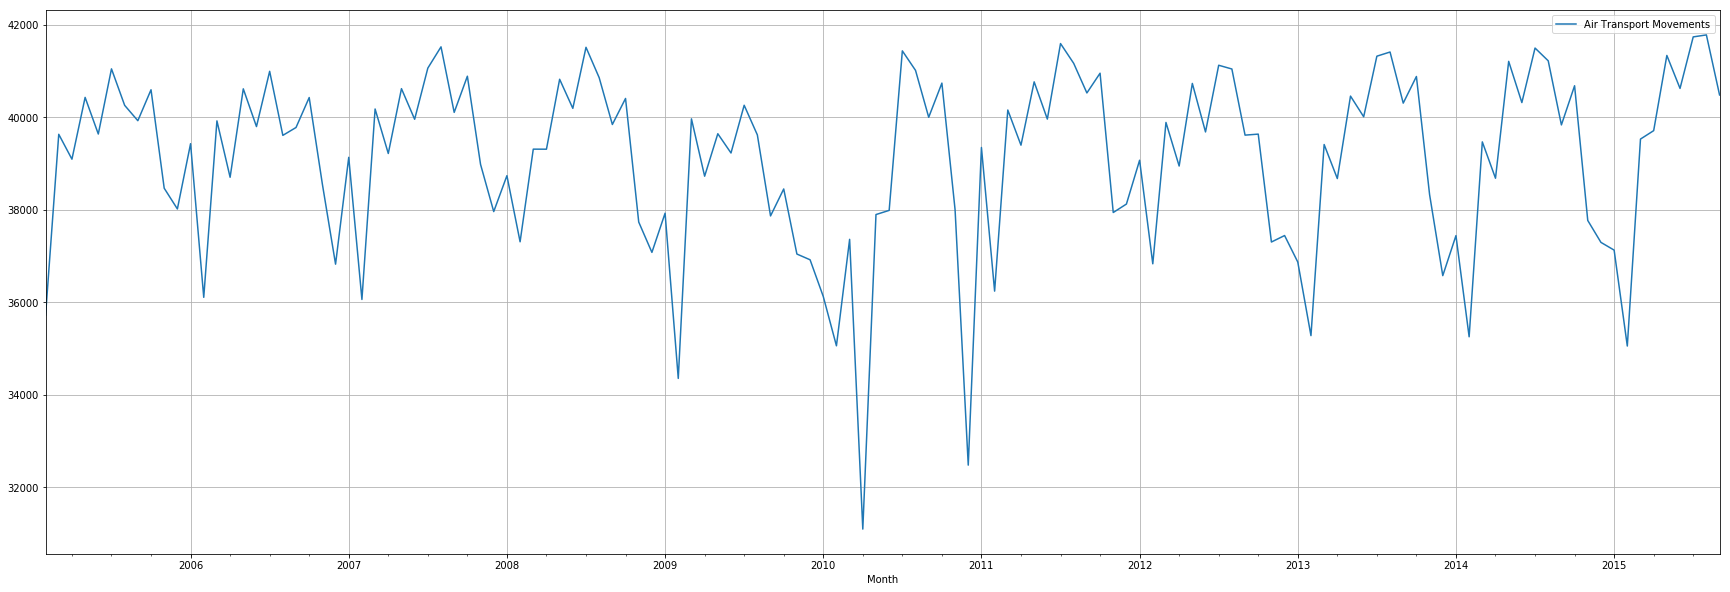

In [6]:
traffic_df[['Month', 'Air Transport Movements']].plot.line(x='Month', y='Air Transport Movements', 
                                                           figsize=(30,10), grid=True);

There's clearly a repeating pattern, showing seasonal activity in this trace. There are three relatively noticable troughs in early 2009, and early and late 2010 which suggest some major disruption to flight patterns.  In general there has been a small increase in the peak activity each year (which looks to be around June and July each year).  However that's not a significant increase in flight numbers over the ten-year period.  Even allowing for the three notable troughs in flight numbers, there has been a small decrease in the flights at the quietest times of the year.

### Passenger numbers

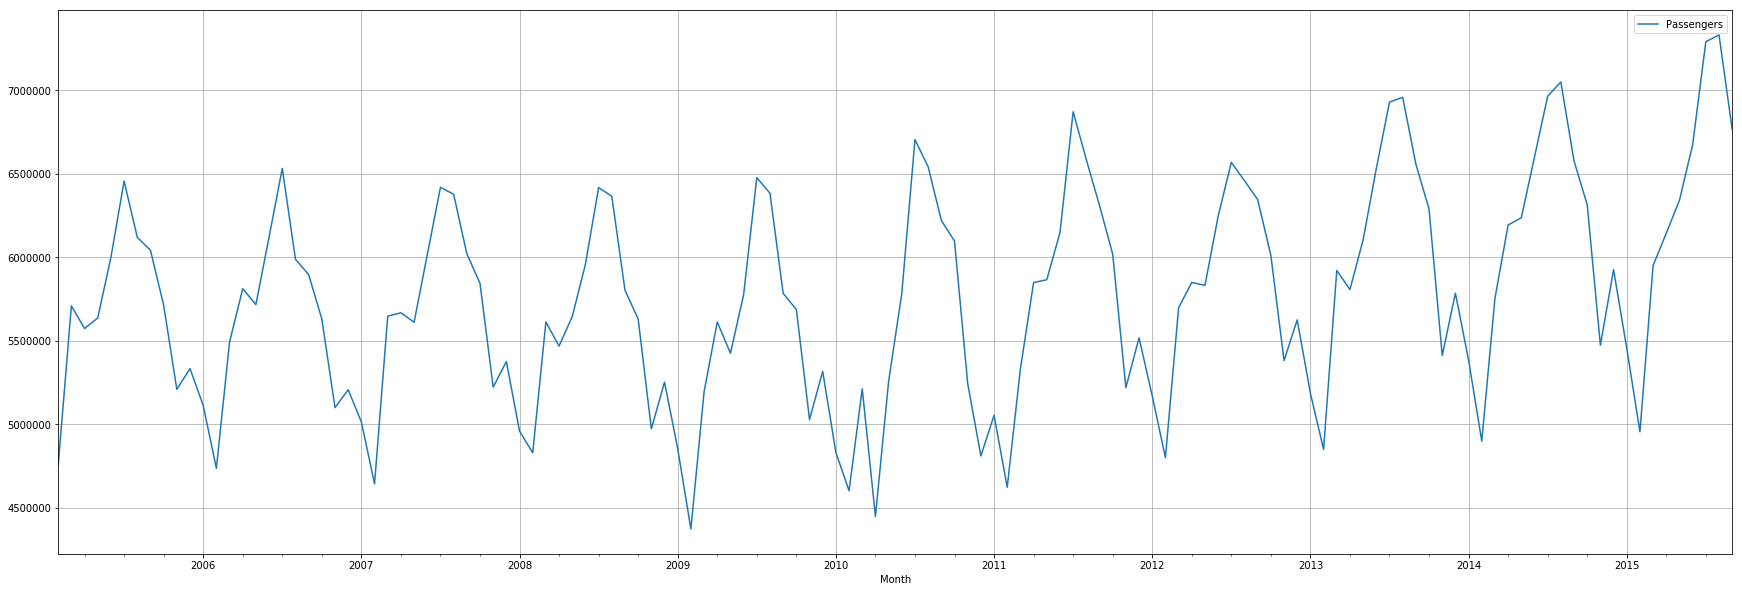

In [7]:
traffic_df[['Month', 'Passengers']].plot.line(x='Month', y='Passengers', 
                                              figsize=(30,10), grid=True);

Passenger numbers show a similar seasonal variation with the data showing similar annual shape, but in general the trend at peak and at lowest points each year is showing an upward trend.  The noted cargo troughs also appear on the passenger numbers for early 2009 and early and late 2010.  

### Noteable events impacting on Heathrow 
As reported, Terminal 5 opened at Heathrow in March 2008; neither graph is showing any particular variations at that time, or immediately following.

A quick search for events that potentially had an impact on Heathrow, or general air traffic in Europe turned up the following:

* A terror alert in August 2006
* A global recession,  Q2 2008 to Q3 2009
* The eruption of Eyjafjallajökull closed European airspace between 15 and 23 April 2010, continuing to affect air traffic in early May
* A major period of bad weather in December 2010
* A period of bad weather in February 2012 
* The Anti-Austerity strikes across Europe in November 2012
* A period of bad weather in January 2013

We will want to identify these points in any story about disruptions to the airport.

### Cargo (metric tonnes) 
We aren't going to explore the cargo data further, but it is worth noting how different the chart's overall shape looks compared to the flight numbers and the passenger numbers.

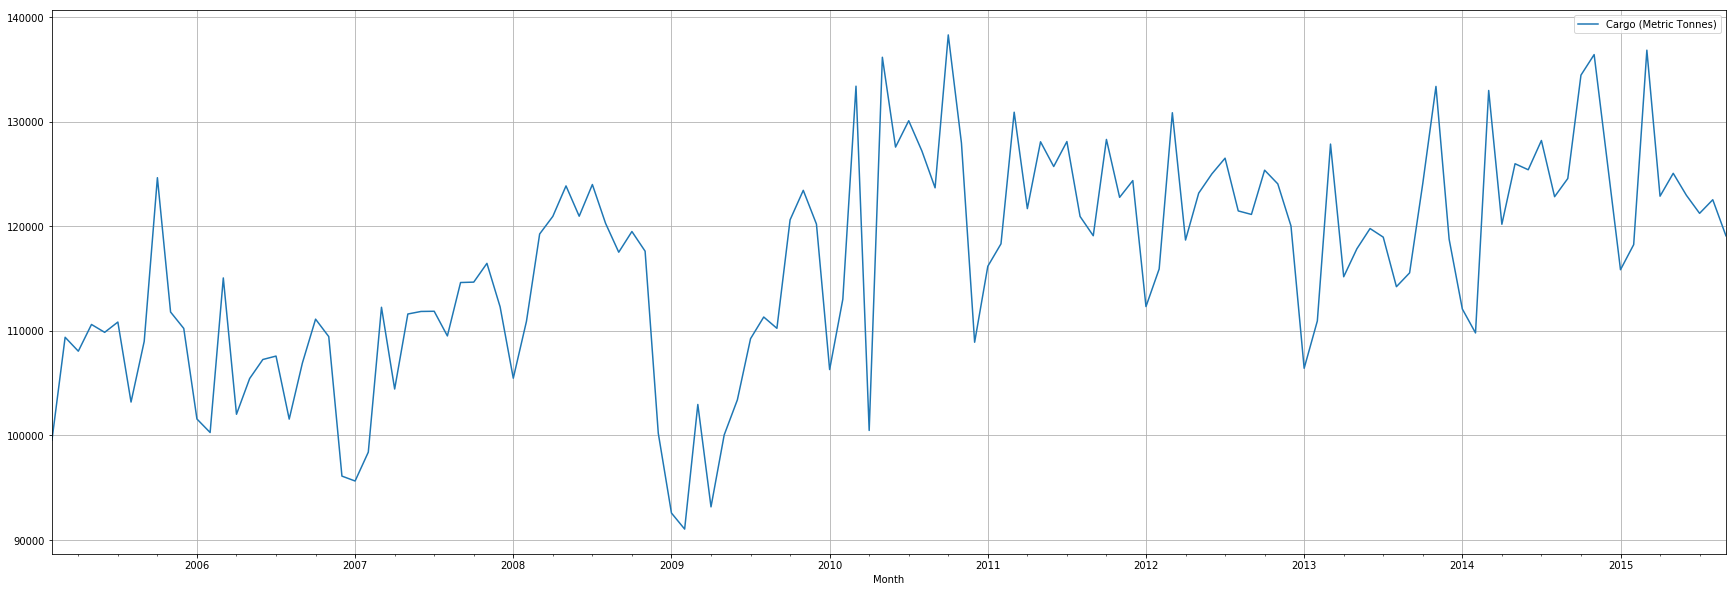

In [8]:
traffic_df[['Month', 'Cargo (Metric Tonnes)']].plot.line(x='Month', y='Cargo (Metric Tonnes)', 
                                                         figsize=(30,10), grid=True);

The cargo figures show a very different graphic, with a major trough from late 2008 through to later 2009 which reflects the period during which the UK (and many global markets) underwent a period of recession. It's quite noticeable that the periods before and after the winter of 2009 appear to show a step change in the highest and lowest points each year.

### The first story we want to tell: has peak capacity been reached?
Our first story is around capacity and any indications that Heathrow is running at full capactity. The number of flights has not dramatically risen during the ten-year period of the graph, while passenger numbers have risen by a significant amount. We're going to want to draw attention to these differences.

These are both noisy graphs, with a lot of seasonal movement evident, but the line graph does seem to be a good chart for this purpose.   Since it's airport capacity we are interested in, we can probably ignore the quiet months, and reshape the dataset so that, in each year, just the peak monthly figure is shown.  This will give us ten peak values over the ten years covered by the dataset.  

We'll plot these first on separate plots, but then combine them onto one chart.  
(Note that we can't just combine them by plotting the two lines on the same axes, as the difference in the scale of values between the two plots prevent a meaningful graph being produced. If you're not sure what I mean - try simply putting the two columns into the `y` parameter for a `plot()` and acccept the defaults.)

In [9]:
# Load the Heathrow dataset.
traffic_df = pd.read_excel('data/traffic_statistics-monthly-heathrow-200501_to_201509.xlsx',
                           sheetname='Heathrow Traffic Statistics', skiprows=2)[1:132]

# First let's make the year and month values explicit in our tables
#  and rename the spreadsheet Month for convenience.
traffic_df.rename(columns={'Month': 'Year-Month'}, inplace=True)
traffic_df['Year'] = traffic_df['Year-Month'].dt.year
traffic_df['Month'] = traffic_df['Year-Month'].dt.month

traffic_df.head(2)

,Year-Month,Passengers,Air Transport Movements,Cargo (Metric Tonnes),Year,Month
1,2005-02-01,4753591,35723,99555.454,2005,2
2,2005-03-01,5708627,39634,109387.896,2005,3


In [10]:
# And we can rescale the Passenger Numbers and AirTransportNumbers 
# so their axes values lose the trailing 0's:
traffic_df['PassengerMillions'] = traffic_df['Passengers']/1000000
traffic_df['MovementThousands'] = traffic_df['Air Transport Movements']/1000

traffic_df.head(2)

,Year-Month,Passengers,Air Transport Movements,Cargo (Metric Tonnes),Year,Month,PassengerMillions,MovementThousands
1,2005-02-01,4753591,35723,99555.454,2005,2,4.753591,35.723
2,2005-03-01,5708627,39634,109387.896,2005,3,5.708627,39.634


In [11]:
# Now group traffic_df by year, and for each year get the maximum 
# passenger and air transport movements values.
traffic_df_grouped = traffic_df.groupby(['Year'])

PeakTraffic_df = traffic_df_grouped['PassengerMillions','MovementThousands'].aggregate('max')

PeakTraffic_df.head(2)

,PassengerMillions,MovementThousands
Year,,
2005,6.456943,41.049
2006,6.533091,40.996


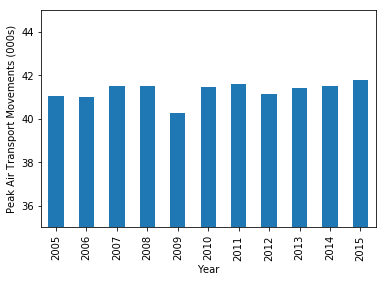

In [12]:
PeakTraffic_df['MovementThousands'].plot.bar(ylim=[35,45])
plt.xlabel('Year')
plt.ylabel('Peak Air Transport Movements (''000s)');

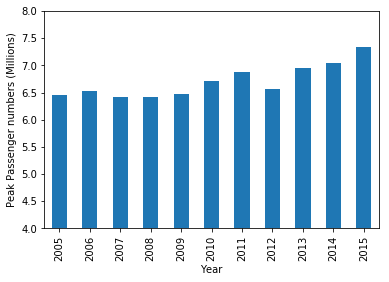

In [13]:
PeakTraffic_df['PassengerMillions'].plot.bar(ylim=[4,8])
plt.xlabel('Year')
plt.ylabel('Peak Passenger numbers (Millions)');

# Pause for thought
The bar graphs look good individually, but won't overlay particularly well when we need two sets of axes - one with a range 4-8 and one with a range 30-50.
Let's go back to a line graph for these values.

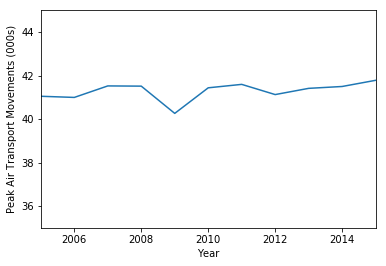

In [14]:
PeakTraffic_df['MovementThousands'].plot.line(ylim=[35,45])
plt.xlabel('Year')
plt.ylabel('Peak Air Transport Movements (''000s)');

In [ ]:
PeakTraffic_df['PassengerMillions'].plot.line(ylim=[4,8])
plt.xlabel('Year')
plt.ylabel('Peak Passenger numbers (Millions)');

## Combining two plots into one figure
Now I want to combine these two plots onto one figure so that we can do a direct 
comparison; but we need different _y_-axis scales for each graphic.

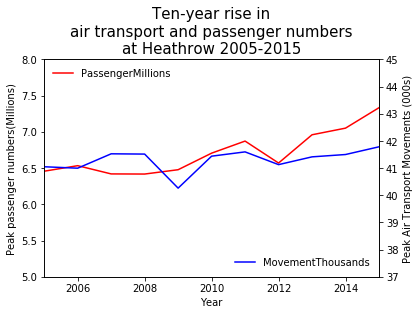

In [15]:
# We have to do some work ourselves rather than simply 
#  letting .plot and plt work things out.

# Let's start with our figure object - the one in which the plots will appear.
fig = plt.figure()

# Now create our first axes object for our first subplot.
# The 111 tells subplot that there we want a grid of 1 by 1 subplots (i.e. 1 of them)
# and that we want this axes to refer to the first of these (i.e the only one):
PassengerAxes = fig.add_subplot(111)
PeakTraffic_df['PassengerMillions'].plot.line(ax=PassengerAxes, 
                                              ylim=[5,8], color='red')
PassengerAxes.set_ylabel('Peak passenger numbers(Millions)')


# We now want a second axes object, in the same place (twinned 
# with the PassengerAxes), furthermore we want the x-axis to 
# be shared (.twiny() would allow us to share the y-axes).
AirTransportAxes = PassengerAxes.twinx()

# Now we can plot onto the AirTransportAxes:
PeakTraffic_df['MovementThousands'].plot.line(ax=AirTransportAxes,
                                              ylim=[37,45], color='blue' )
# and set the AirTransport Axes y-axis label,
AirTransportAxes.set_ylabel('Peak Air Transport Movements (''000s)')

# and we can set the position for each axes legend,
PassengerAxes.legend(loc=2, frameon=False, fontsize=10)
AirTransportAxes.legend(loc=4, frameon=False, fontsize=10)

# and a title
plt.title('Ten-year rise in\nair transport and passenger numbers\nat Heathrow 2005-2015', 
          fontsize=15);


At this point there is plenty of white space to add descriptive text, perhaps reporting the ten-year percentage increases in each traffic; and of course a reminder that the two _y_-axes have different scales.

So is Heathrow nearing peak capacity? It certainly looks as if the total number of flights is not growing dramatically, but with passenger numbers continuing to rise they're either putting more passengers into each aircraft or flying bigger aircraft (or maybe fewer of the flights are carrying cargo).

### The second story
Our second story requires a different approach: here we want to see the impact of specific events on passenger and flight numbers. 

The raw graphs could be labelled with simple point markers to indicate the months in which the 'point' events (those of short duration) took place. The longer duration period could be shown by placing a line or shading the graph between the two dates. However, the impact of the events requires comparison with the same period in preceeding and subsequent years.  We need to easily compare (say) January in 2010 with January in 2009 and 2011.  So we want to show data from the same month together.

I chose to show each data point sorted by month; we're not aggregating the data as we want to see each actual data point, so there is no need to group the data.  As you will see this has the effect of stacking each months value into a column, and in that column we want to single out the specific year of interest. 

We also want to see which months were in long-term events - such as the recession - which span more than one month.  We can do this by colouring the scatter points.

The colouring and the identification of data points of interest is a manual process (in this case); in a different kind of investigation it may be possible to automate this, using category, or lists of data points of interest.  Similarly the placement of text needs fine tuning to ensure it doesn't obscure the detail in the data. So the following cells represent the result of a number of iterations (even trying different colour combinations) to adjust parameters until I achieved something I was reasonably happy with.

In [16]:
# Set the default colour for all non-disrupted monthly data: 
traffic_df['Colour'] = 'orange'

# Now to set the Colour values for periods of long-term disruption
# (luckily there are no overlapping periods or we'd have had to do 
#  something different to simple colouring).

# The global recession Q2, 2008 to Q3, 2009
traffic_df.loc[((traffic_df.Year == 2008) & (traffic_df.Month >= 4)), ['Colour']] = 'purple'
traffic_df.loc[((traffic_df.Year == 2009) & (traffic_df.Month <= 9)), ['Colour']] = 'purple'

# The 2012 Olympics took place between July and August 2012.
traffic_df.loc[((traffic_df.Year == 2012) & (traffic_df.Month == 7)), ['Colour']] = 'green'
traffic_df.loc[((traffic_df.Year == 2012) & (traffic_df.Month == 8)), ['Colour']] = 'green'

# I'll also use colour to tie together the dots for the three periods of bad 
# winter weather Dec 2010, Feb 2012, and Jan 2013.
traffic_df.loc[((traffic_df.Year == 2010) & (traffic_df.Month == 12)), ['Colour']] = 'red'
traffic_df.loc[((traffic_df.Year == 2012) & (traffic_df.Month ==  2)), ['Colour']] = 'red'
traffic_df.loc[((traffic_df.Year == 2013) & (traffic_df.Month ==  1)), ['Colour']] = 'red'

traffic_df.tail(5)

,Year-Month,Passengers,Air Transport Movements,Cargo (Metric Tonnes),Year,Month,PassengerMillions,MovementThousands,Colour
124,2015-05-01,6342533,41339,125066.832,2015,5,6.342533,41.339,orange
125,2015-06-01,6675186,40626,122964.049,2015,6,6.675186,40.626,orange
126,2015-07-01,7292273,41740,121239.526,2015,7,7.292273,41.740,orange
127,2015-08-01,7333100,41783,122540.486,2015,8,7.333100,41.783,orange
128,2015-09-01,6766212,40484,119091.435,2015,9,6.766212,40.484,orange


In [17]:
# Now a quick check that sorting on Month gives us a sensible result:
traffic_df_sorted = traffic_df.sort_values(by=['Month','Year'])

# The following turned out to be handy when I needed to find the values of the data points
# that I needed to annotate - I could change the month value to display the relevant data, 
# pick out the year of interest then cut and paste the relevant values into the later cells.

traffic_df_sorted[traffic_df_sorted.Month == 1]

,Year-Month,Passengers,Air Transport Movements,Cargo (Metric Tonnes),Year,Month,PassengerMillions,MovementThousands,Colour
12,2006-01-01,5112718,39431,101573.089,2006,1,5.112718,39.431,orange
24,2007-01-01,5013163,39136,95643.778,2007,1,5.013163,39.136,orange
36,2008-01-01,4957887,38739,105474.712,2008,1,4.957887,38.739,orange
48,2009-01-01,4853191,37928,92580.317,2009,1,4.853191,37.928,purple
60,2010-01-01,4830092,36128,106299.456,2010,1,4.830092,36.128,orange
72,2011-01-01,5052726,39349,116176.347,2011,1,5.052726,39.349,orange
84,2012-01-01,5169518,39073,112323.992,2012,1,5.169518,39.073,orange
96,2013-01-01,5184924,36872,106424.594,2013,1,5.184924,36.872,red
108,2014-01-01,5383877,37443,112093.494,2014,1,5.383877,37.443,orange
120,2015-01-01,5454689,37130,115846.895,2015,1,5.454689,37.130,orange


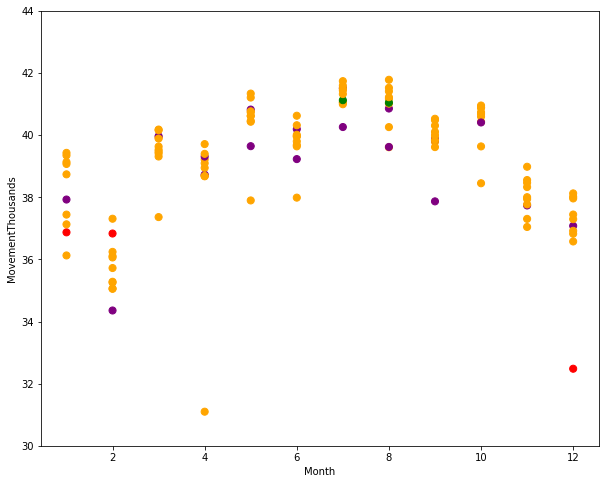

In [18]:
# The basic plot has been constructed with pandas plot()
# This creates a matplotlib plot figure that we can then add to using
# matplotlib or matplotlib.pyplot functionality.

# Here we show the data as a scatter plot, with each point 50 units in size (s).
# We've set the ylim limits to avoid a lot of empty white space, and used the colour values 
# to colour the scatter points.
traffic_df_sorted.plot.scatter(x='Month', y='MovementThousands', 
                               ylim=[30,44], figsize=(10,8),
                               s=50, 
                               c=traffic_df_sorted['Colour'])

In [ ]:
# We now want to take this basic plot and add useful 
# information (like month names), a description of the 
# data on the axes, and to identify and describe the 
# points of interest.

# So, we start with our basic plot:
traffic_df_sorted.plot.scatter(x='Month', y='MovementThousands', 
                               ylim=[30,43], figsize=(10,8),
                               s=50, 
                               c=traffic_df_sorted['Colour'])


# Title and axes labels can be added:
plt.title('Impact of disruption to Air Transport Movements', fontsize=20, color='Blue')
plt.xlabel('Jan 2005 - Sep 2015, by month')
plt.ylabel('Air Transport Movements (''000s)')

# The basic plot uses the month numbers on the x-axis.
# We want to supply the month names to use in their place.
# The xticks(range(13),... says I want 13 ticks on the
#    line with values 0,1,..12; the name list then says replace 
#    the numbers with the corresponding value from this list.
#    Note the '' name at the start of the names list to match the 0 tick.
plt.xticks(range(13),['','Jan','Feb','Mar','Apr', 'May','Jun',
                        'Jul','Aug','Sep','Oct','Nov','Dec'])

# We want to add annotations to the specific points that may have disrupted the airport.
# Note that the xy and xytext values are data coordinates (x,y).
plt.annotate('Eyjafjallajökull erupts\nApr 2010', xy=(4,31.098), xytext=(4,32), 
             arrowprops=dict(arrowstyle='->', facecolor='black'))
plt.annotate('                       \n        ', xy=(5,37.899), xytext=(4,32.5), 
             arrowprops=dict(arrowstyle='->', facecolor='black'))
plt.annotate('Dec 2010', xy=(12,32.481), xytext=(12,31), 
             arrowprops=dict(arrowstyle='->', facecolor='black'))
plt.annotate('Jan 2013', xy=(1,36.872), xytext=(1,32), 
             arrowprops=dict(arrowstyle='->', facecolor='black'))
plt.annotate('Feb 2012', xy=(2,36.8345), xytext=(2,33), 
             arrowprops=dict(arrowstyle='->', facecolor='black'))
plt.annotate('Anti-austerity\nstrikes across\nEurope\nNov 2012', xy=(11,37.305), xytext=(11,35), 
             arrowprops=dict(arrowstyle='->', facecolor='black'))
plt.annotate('A terror alert\nAug 2006', xy=(8,39.611), xytext=(8,34), 
             arrowprops=dict(arrowstyle='->', facecolor='black'))
plt.annotate('Baggage handler\nstrike\nJun 2010', xy=(6,37.989), xytext=(5,36), 
             arrowprops=dict(arrowstyle='->', facecolor='black'))

# Since we've created our own colouring scheme, we need to create a list of colour patches and
# a text for use as the plots legend.  

# The mpatches.Patch() from matplotlib creates an element that can 
# be used in the handles parameter of the plt.legend() function to create an entry in the legend.

import matplotlib.patches as mpatches
legendpatch_list = ([mpatches.Patch(color='red', label='Severe Winter Weather')]+
                    [mpatches.Patch(color='green', label='London Olympics')]+
                    [mpatches.Patch(color='purple', label='2008-9 Recession')])   
# We want to show that legend with our graphic.
# Here the x,y values for the location are figure coordinates between 0 and 1.
#  If you exceed 1, the legend is drawn outside the figure (as shown in this example).
plt.legend(handles=legendpatch_list, loc=(1.1,0.7) )

# If you want to save the output, the defaut is to PNG format.
# It's a simple call to which you supply the filename and path for the output
# (Check the output directory path exists and if it doesnlt, create it.)
!mkdir -p visualisation-output-files
plt.savefig('visualisation-output-files/DisruptionToAirTransportMovements.png')
# However note that the legend is outside the figure boundaries in this example,
# so is not included in the PNG output.

Having built the above for the air transport movements it's a relatively easy step to change this for the passenger numbers - although there's a need to manually reset the annotated `xy` values.

The colouring, and the sorted traffic DataFrame, remain the same: everything we need to adapt is in the last cell above, so we can copy it to the cell below and edit the values directly. (The following cell contains the result of my adjustments.)

In [ ]:
traffic_df_sorted.plot.scatter(x='Month', y='PassengerMillions', 
                               ylim=[4,8], figsize=(10,8),
                               s=50, 
                               edgecolors=traffic_df_sorted['Colour'],
                               c='white')

# Title and axes labels:
plt.title('Impact of disruption to Passenger numbers', fontsize=20, color='Blue')
plt.xlabel('Jan 2005 - Sep 2015, by month')
plt.ylabel('Passenger numbers (Millions)')

# Use month names on the x-axis; the range(13) basically says I 
# want 13 ticks on the line with values 0,1,...,12
plt.xticks(range(13),['','Jan','Feb','Mar','Apr', 'May','Jun',
                        'Jul','Aug','Sep','Oct','Nov','Dec'])

# Now add annotations to specific points.
# The annotation uses the data points for x and y values,
# so these need to be reset for the Passenger Numbers.
plt.annotate('Eyjafjallajökull erupts\nApr 2010', xy=(4,4.446530), xytext=(4,4.75), 
             arrowprops=dict(arrowstyle='->', facecolor='black'))
plt.annotate('                       \n        ', xy=(5,5.255772), xytext=(4,5), 
             arrowprops=dict(arrowstyle='->', facecolor='black'))
plt.annotate('Dec 2010', xy=(12,4.809195), xytext=(12,4.5), 
             arrowprops=dict(arrowstyle='->', facecolor='black'))
plt.annotate('Jan 2013', xy=(1,5.184924), xytext=(1,4.1), 
             arrowprops=dict(arrowstyle='->', facecolor='black'))
plt.annotate('Feb 2012', xy=(2,4.798785), xytext=(3,4.25), 
             arrowprops=dict(arrowstyle='->', facecolor='black'))
plt.annotate('Anti-austerity strikes\nacross Europe\nNov 2012', xy=(11,5.381138), xytext=(10,4.1), 
             arrowprops=dict(arrowstyle='->', facecolor='black'))
plt.annotate('A terror alert\nAug 2006', xy=(8,5.987755), xytext=(8,4.5), 
             arrowprops=dict(arrowstyle='->', facecolor='black'))
plt.annotate('Baggage handler\nstrike\nJun 2010', xy=(6,5.783051), xytext=(6,5.25), 
             arrowprops=dict(arrowstyle='->', facecolor='black'))

import matplotlib.patches as mpatches
legendpatch_list = ([mpatches.Patch(color='red', label='Severe Winter Weather')]+
                   [mpatches.Patch(color='green', label='London Olympics')]+
                   [mpatches.Patch(color='pink', label='2008-9 Recession')])   
# legend location uses figure coordinates not data coordinates:
plt.legend(handles=legendpatch_list, loc=(0.65,0.85) )

# And save it to include in our written report:
plt.savefig('visualisation-output-files/DisruptionToPassengerNumbers.png')

Well, that's two graphics, one showing air traffic and the other showing passenger movements.  There are clearly some interesting comparisons to be made (and of course I may have missed several important events, or underlying trends that make the above a misleading reporting visualisation).

But does it tell any stories?  Sadly, not that well - I'm not a graphic designer - but even with the limitations in the charts above I've been able to draw attention to several things I would want my story to feature.   Winters are bad for Heathrow.  Recessions are bad for passenger numbers.  Volcanoes are bad for airports.  And, perhaps surprisingly, during the Olympic months the passenger numbers at Heathrow weren't the highest for those months in the ten years shown.

One of the problems with these graphics is that they are trying to tell several distinct stories - as a result it's cluttered and there are to many things trying to attract the reader's attention.

You may want to use these, or other datasets, to practice your story telling and reporting.  (I'm fairly sure there are some simple adjustments to the above examples that will improve things.)  You might want to critique the above, or suggest and implement some improvements on the module forums or in OpenStudio.  If you do decide to do this, I'd recommend picking one story and telling it well!

# What next?
In this Notebook, we have introduced some of the features of matplotlib that help in the production of graphics to support reporting results. 

As always, feel free to extend this Notebook as your own personal reference by adding further sections about additional chart types or adornments.

If you are working through this Notebook as part of an inline exercise, return to the module materials now. 

If you are working through this set of Notebooks as a whole, you have completed the final Notebook in Parts 1-5 of the module.

## Using matplotlib to recreate two example figures from the main text (optional)

### The Medicare graphic revisited
####              (Figure 5.5, Projected costs of Medicare at various time points)

Without access to the original datasets this would be very complex to recreate.  

So, let's simplify it while aiming to achieve a similar effect. 
We're going to plot four line charts.  Three of these will be old (background) data; we want those lines to be faded/grey muted colours. We want the fourth to immediately catch the eye - the focus point of our story is the new data.

In this example it doesn't really matter what the story is, we're simply demonstrating a range of pre-attentive attributes that were used in the original figure to draw the eye to the key player in our story.

In [20]:
# Here are our four datasets:
data_df = pd.DataFrame({'Old1' : [1,8,12,16,23,27,30],
                        'Old2' : [1,12,15,14,20,17,21],
                        'Old3' : [3,9,12,15,18,16,25],
                        'New'  : [1,9,14,18,21,18,22]
                        })
data_df

,New,Old1,Old2,Old3
0,1,1,1,3
1,9,8,12,9
2,14,12,15,12
3,18,16,14,15
4,21,23,20,18
5,18,27,17,16
6,22,30,21,25


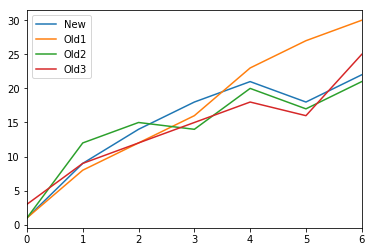

In [21]:
# If we simply plot this data, our focal point isn't really that clear.

data_df.plot.line();

# We need to make the New data stand out. 

In [1]:
# To do this I'm going to split the plot into two, and will 
# use the matplotlib.pyplot features.

# Starting with our 'interesting data':
plt.plot(data_df['New'], 'red')

# Now unless we tell matplotlib otherwise, it will continue 
# to use the 'current' plot for any additional plots or 
# annotations.

# So we can simply plot the other three lines,  
# but with greyscale values in place of colour,
# and matplotlib will use the existing figure.

plt.plot(data_df['Old1'], '0.7',
         data_df['Old2'], '0.8',
         data_df['Old3'], '0.9');


NameError: name 'data_df' is not defined

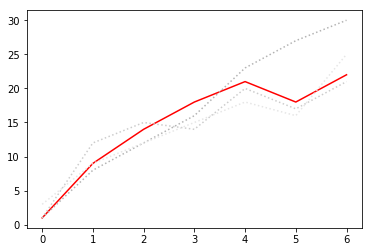

In [23]:
plt.plot(data_df['New'], 'red')

# To mute the second set of plot lines further I can also change 
# the continuous line to a dotted line.
plt.plot(data_df['Old1'], '0.7', 
         data_df['Old2'], '0.8',
         data_df['Old3'], '0.9', 
         linestyle = 'dotted');

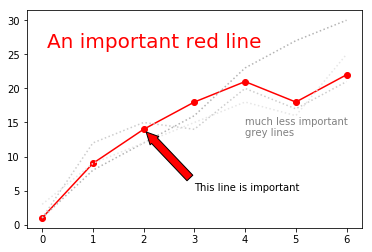

In [24]:
# If I want to emphasise the actual data points on the line, 
# I can use a marker (there are many different marker and 
# lines styles available).
plt.plot(data_df['New'], color='red', marker='o' )

# Let's point out the important line, with a big arrow:
plt.annotate('This line is important', xy=(2,14), xytext=(3,5), 
             arrowprops=dict(facecolor='red', shrink=0.05, width=8))

# I could put some descriptive, eye-catching text about the red line:
plt.text(0.1, 26, 'An important red line',
        fontsize=20, color='red')

# And, in keeping with not wanting much attention to be drawn to the grey lines, 
# I can add grey, small text to describe those.
plt.plot(data_df['Old1'], '0.7', 
         data_df['Old2'], '0.8',
         data_df['Old3'], '0.9', 
         linestyle='dotted')
plt.text(4, 13, 'much less important\ngrey lines',
        fontsize=10, color='grey');


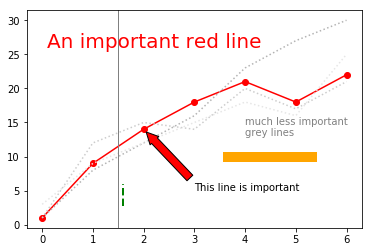

In [25]:
plt.plot(data_df['New'], color='red', marker='o' )
plt.annotate('This line is important', xy=(2,14), xytext=(3,5), 
             arrowprops=dict(facecolor='red', shrink=0.05, width=8))
plt.text(0.1, 26, 'An important red line',
        fontsize=20, color='red')

plt.plot(data_df['Old1'], '0.7', data_df['Old2'], '0.8', 
         data_df['Old3'], '0.9', linestyle='dotted')
plt.text(4, 13, 'much less important\ngrey lines',
        fontsize=10, color='grey')

# In the original Medicare graphic there was a vertical line 
# shown at 2010, we can add a vertical line to our plot with 
# the axvline() method, 
# axhline() does the same for horizontal lines.
plt.axvline(x=1.5, linewidth=1, color='grey')

# If you want the line to only cover part of the vertical range 
# you can specify which portion, but this uses figure coordinates 
# (values between 0 and 1) not data coordinates.
plt.axvline(x=1.6, ymin=0.1, ymax=0.2, linewidth=2, linestyle='dashed', color='green')

# For good measue we can see that axhline() can do the same.
plt.axhline(y=10, xmin=0.6, xmax=0.85, linewidth=10, color='orange');


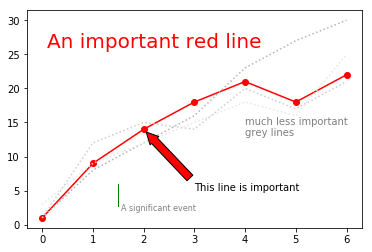

In [39]:
# Tidying up a bit, we've got the majority of the features that 
# appear in the Medicare graphic recreated in this example.

# First build up our main story character and draw attention to it.
plt.plot(data_df['New'], color='red', marker='o' )
plt.annotate('This line is important', xy=(2,14), xytext=(3,5), 
             arrowprops=dict(facecolor='red', shrink=0.05, width=8))
plt.text(0.1, 26, 'An important red line',
        fontsize=20, color='red')

# Now address the less important data in our story (in this example
# these are treated similarly, but we could take different 
# approaches for each dataset):
plt.plot(data_df['Old1'], '0.7', data_df['Old2'], '0.8', 
         data_df['Old3'], '0.9', linestyle = 'dotted')
plt.text(4, 13, 'much less important\ngrey lines',
        fontsize=10, color='grey')

# Finally any additional annotations that supply context to the story:
plt.axvline(x=1.5, linewidth=1, ymin=0.1, ymax=0.2, color='green')
plt.text(1.55, 2, 'A significant event', fontsize=8, color='grey' );


### The combined life expectancy, GDP and population graphic revisited 
####                       (Figure 5.15)

This example will create a graphic similar to that in Part 5, Figure 5.15 showing countries' size, GDP and life expectancy using the 'bubble' version of the scatter chart.  For this I will use the _pandas_ `plot()` method and matplotlib features.

It may not be the only way to generate a graphic of this kind, but the elements used will hopefully show how similar results can be achieved with other datasets.

#### The data
The data for these DataFrames can be found in the `data/World GDP Life expectancy Data` folder.  There are four raw files and four files with names beginning `focussed`; the focussed files have had the metadata and extraneous columns and rows removed using Excel.  What remains are the core datasets required for this graphic; these core datasets were all extracted from the raw files.

#### Read in the datasets
All the datasets are held in `.xls` or `.xlsx` files with no metadata except the column headings, although some have multiple sheets, so need the sheet specifying.

I've done some additional column renaming to save naming clashes later when merging the DataFrames.

In [27]:
# Read in the population data:
population_df = pd.read_excel(
               'data/World GDP Life expectancy Data/focussed 2010_TOTAL_POPULATION_BOTH_SEXES.XLS',
                sheetname='ESTIMATES')
population_df.rename(columns={'2010': 'Pop_2010', ' country or area': 'country'},
                     inplace=True)
#population_df.head(3)
#population_df.tail(3)
population_df.sort_values(by=['Pop_2010'])

,country,Country code,Pop_2010
138,Holy See,336,0.799
229,Tokelau,772,1.135
227,Niue,570,1.621
197,Falkland Islands (Malvinas),238,2.856
54,Saint Helena,654,4.173
174,Montserrat,500,4.953
208,Saint Pierre and Miquelon,666,6.274
231,Tuvalu,798,9.827
221,Nauru,520,10.025
232,Wallis and Futuna Islands,876,13.565


In [28]:
# Read in the GDP data:
GDP_df = pd.read_excel('data/World GDP Life expectancy Data/focussed 2010 UIS World GDP US$.xlsx')
GDP_df.rename(columns={'2010': 'GDP_2010'},
              inplace=True)
#GDP_df.head(3)
GDP_df.tail(3)

,Country,GDP_2010
224,Yemen,3.18834e+10
225,Zambia,1.61902e+10
226,Zimbabwe,7.43331e+09


In [29]:
# Read in the life expectancy data:
lifeexpectancy_df = pd.read_excel('data/World GDP Life expectancy Data/focussed 2010 LifeExpectancy.xls',
                           sheetname='Data')
lifeexpectancy_df.rename(columns={'ISO 3166-1 numeric code': 'numeric code', 
                                  '2010 - 2015': 'LE_2010'},
                  inplace=True)
#lifeexpectancy_df.head(3)
lifeexpectancy_df.tail(3)

,Location_trimmed,Location,numeric code,LE_2010
197,Samoa,Samoa,882,73.02
198,Yemen,Yemen,887,63.51
199,Zambia,Zambia,894,58.75


In [30]:
# Read in the classification of country to world region, 
# using WorldBank classifications: 
regions_df = pd.read_excel('data/World GDP Life expectancy Data/focusssed Worldbank Country Classification.xls')
#regions_df.head(3)
regions_df.tail(3)

,Economy,Region
213,"Yemen, Rep.",Middle East & North Africa
214,Zambia,Sub-Saharan Africa
215,Zimbabwe,Sub-Saharan Africa


#### Now merge the datasets
We'll first use outer horizontal joins on appropriate fields.  This will allow us to see which rows we would gain, or lose, if we applied an inner join. Country name spelling, and full v. abbreviated versions, may cause some failures to join.  Joining over the ISO `numeric_code` values should be trouble free.  Of course there is always the possibility that some countries don't appear in all the tables ('the Holy See' being one).

I'll leave all the NaN's from the unmatched joins in for now - then we can see how they're distributed - remember the final graphic for our storytelling isn't about having every single data point plotted, so some loses might be acceptable. Although it may turn out that only a few countries need their names adjusting.

Looking at the column headers we should be able to join regions and GDP, then population and life expectancy, then join the two tables that result.

In [31]:
regions_GDP_df = pd.merge(regions_df, GDP_df, how='outer',
                     left_on='Economy', right_on='Country')
regions_GDP_df.head(3)

,Economy,Region,Country,GDP_2010
0,Afghanistan,South Asia,Afghanistan,1.59368e+10
1,Albania,Europe & Central Asia,Albania,1.18582e+10
2,Algeria,Middle East & North Africa,Algeria,1.61207e+11


In [32]:
pop_le_df = pd.merge(population_df, lifeexpectancy_df, how='outer',
                     left_on='country', right_on='Location_trimmed')
pop_le_df.head(3)

,country,Country code,Pop_2010,Location_trimmed,Location,numeric code,LE_2010
0,Burundi,108,9461.117,Burundi,Burundi,108.0,56.07
1,Comoros,174,698.695,Comoros,Comoros,174.0,62.83
2,Djibouti,262,830.802,Djibouti,Djibouti,262.0,61.61


In [33]:
full_df = pd.merge(regions_GDP_df, pop_le_df, how = 'outer',
                     left_on = 'Country', right_on = 'country')
full_df.head(20)

,Economy,Region,Country,GDP_2010,country,Country code,Pop_2010,Location_trimmed,Location,numeric code,LE_2010
0,Afghanistan,South Asia,Afghanistan,1.59368e+10,Afghanistan,4.0,27962.207,Afghanistan,Afghanistan,4.0,59.82
1,Albania,Europe & Central Asia,Albania,1.18582e+10,Albania,8.0,2901.883,Albania,Albania,8.0,77.49
2,Algeria,Middle East & North Africa,Algeria,1.61207e+11,Algeria,12.0,36036.159,Algeria,Algeria,12.0,74.42
3,American Samoa,East Asia & Pacific,American Samoa,..,American Samoa,16.0,55.636,NaN,NaN,NaN,NaN
4,Andorra,Europe & Central Asia,Andorra,..,Andorra,20.0,84.419,NaN,NaN,NaN,NaN
5,Angola,Sub-Saharan Africa,Angola,8.24709e+10,Angola,24.0,21219.954,Angola,Angola,24.0,51.68
6,Antigua and Barbuda,Latin America & Caribbean,Antigua and Barbuda,1.16153e+09,Antigua and Barbuda,28.0,87.233,Antigua and Barbuda,Antigua and Barbuda,28.0,75.82
7,Argentina,Latin America & Caribbean,Argentina,3.68736e+11,Argentina,32.0,41222.875,Argentina,Argentina,32.0,76.01
8,Armenia,Europe & Central Asia,Armenia,9.2603e+09,Armenia,51.0,2963.496,Armenia,Armenia,51.0,74.56
9,Aruba,Latin America & Caribbean,Aruba,2.4677e+09,Aruba,533.0,101.597,Aruba,Aruba,533.0,75.39


#### And now to data cleaning - _I thought it was all looking too easy!_
It turned out there were rather a lot of NaNs appearing.

After some attempts at tidying up the DataFrame produced above, a colleague suggested simply putting the DataFrame into a CSV file and tidying it in Excel. This proved quite straightforward.
I saved the above DataFrame to a file `totidy_GDP_LE_Region.csv` and, once tidied I've copied that to `tidy_GDP_LE_Region.csv` so you can see the before and after versions.

In [34]:
full_df.to_csv('data/World GDP Life expectancy Data/totidy_GDP_LE_Region.csv', 
               index=False, header=True)

The cleaning took about 30 minutes of matching names, abbreviations and spellings, and in a few cases researching the name of the country and working out which region to allocate it to.  There were a few economies and countries that couldn't be matched, so these were simply deleted (while I'm not suggesting these are insignificant countries, the graphic doesn't require every country to be represented).  There are still several empty values, but I think the plot command should be able to drop these without further manual intervention.   The '..' strings in several cells have now all been removed, leaving those cells empty.

In [35]:
tidyfull_df = pd.read_csv('data/World GDP Life expectancy Data/tidy_GDP_LE_Region.csv') 
tidyfull_df.head(20)

,Economy,Region,Country,GDP_2010,country,Country code,Pop_2010,Location_trimmed,Location,numeric code,LE_2010
0,Afghanistan,South Asia,Afghanistan,1.593678e+10,Afghanistan,4.0,27962.207,Afghanistan,Afghanistan,4.0,59.82
1,Albania,Europe & Central Asia,Albania,1.185817e+10,Albania,8.0,2901.883,Albania,Albania,8.0,77.49
2,Algeria,Middle East & North Africa,Algeria,1.612070e+11,Algeria,12.0,36036.159,Algeria,Algeria,12.0,74.42
3,American Samoa,East Asia & Pacific,American Samoa,NaN,American Samoa,16.0,55.636,NaN,NaN,NaN,NaN
4,Andorra,Europe & Central Asia,Andorra,NaN,Andorra,20.0,84.419,NaN,NaN,NaN,NaN
5,Angola,Sub-Saharan Africa,Angola,8.247089e+10,Angola,24.0,21219.954,Angola,Angola,24.0,51.68
6,Antigua and Barbuda,Latin America & Caribbean,Antigua and Barbuda,1.161529e+09,Antigua and Barbuda,28.0,87.233,Antigua and Barbuda,Antigua and Barbuda,28.0,75.82
7,Argentina,Latin America & Caribbean,Argentina,3.687360e+11,Argentina,32.0,41222.875,Argentina,Argentina,32.0,76.01
8,Armenia,Europe & Central Asia,Armenia,9.260297e+09,Armenia,51.0,2963.496,Armenia,Armenia,51.0,74.56
9,Aruba,Latin America & Caribbean,Aruba,2.467704e+09,Aruba,533.0,101.597,Aruba,Aruba,533.0,75.39


In [36]:
# And now calculate the per capita GDP value and add it as a column:
tidyfull_df['GDPperCapita'] = tidyfull_df['GDP_2010']/(tidyfull_df['Pop_2010']*1000)
tidyfull_df.head(3)

,Economy,Region,Country,GDP_2010,country,Country code,Pop_2010,Location_trimmed,Location,numeric code,LE_2010,GDPperCapita
0,Afghanistan,South Asia,Afghanistan,1.593678e+10,Afghanistan,4.0,27962.207,Afghanistan,Afghanistan,4.0,59.82,569.940149
1,Albania,Europe & Central Asia,Albania,1.185817e+10,Albania,8.0,2901.883,Albania,Albania,8.0,77.49,4086.369538
2,Algeria,Middle East & North Africa,Algeria,1.612070e+11,Algeria,12.0,36036.159,Algeria,Algeria,12.0,74.42,4473.478985


##### Note
All the above has been to get the dataset into the format that we can use to easily produce the basic chart before enhancing it to turn it into an informative visualisation. So the above would have been done as part of the data acquistion, preparation and analysis stages and the final DataFrame would be the starting point for the reporting process. 

#### The basic plot
You might want to take a quick look at Figure 5.15 to remind yourself what it looks like, and what I'm trying to recreate.

The basic plot in Figure 5.15 is quite straightforward - a bubble scatter plot, with colour of the bubble controlled by the region and the size of the bubble by the population.  The _x_ and _y_ axes of the scatter plot are the GDP and life expectancy values. (The GDP per capita requires a log representation.)

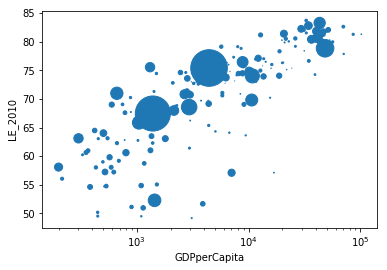

In [37]:
# Before doing anything further let's make sure this looks a bit like the 
# original graphic. (Allowing for differences in the data caused by picking 
# different years.)

# Aside: The first few times I worked with this data I was getting a similar 
# but not quite close enough distribution of large and small bubbles - it took 
# me a while to spot that I had been working with the GDP not 
# GDP per capita figures!

tidyfull_df.plot.scatter(x='GDPperCapita', y='LE_2010', logx=True,
                         s=(tidyfull_df['Pop_2010']/1000))


FileNotFoundError: [Errno 2] No such file or directory: 'visualisation-output-files/GDPLEPOP.png'

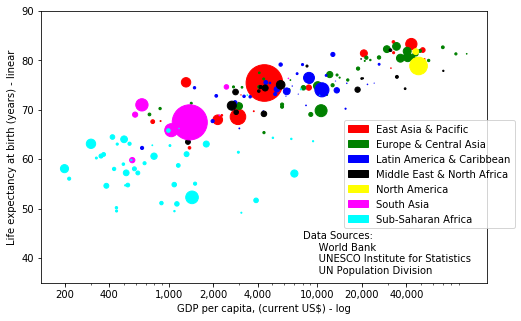

In [38]:
# I'm going to take a slightly different approach to what we 
# have seen in earlier examples. Each Region will be plotted 
# separately on the same set of axes; previously with the 
# four lines example, we've not worried about the detail of 
# using subplots, we've simply let .matplotlib figure it out.

# Note: subplots are an extremly rich feature of matplotlib:
# they allow multiple different plots to be combined on the 
# same axes, or multiple sets of axes to appear within the 
# same figure. We won't be able to explore these in detail here.


# plt.subplots() creates a plotting object that can accept 
# multiple plots, this is embedded in a single figure.
fig, ax = plt.subplots()

# fig is the figure object in which the plot is embedded. (Recall 
# the distinction between figure cordinates and data coordindates: 
# some elements are drawn on the figure, and some on the axes.)

# ax is the axes object that carries the plot axes; we are going to 
# tell the plot command to explicitly use the same axes object each 
# time it is called.

# Set up the colour dict for each region:
colours = {'East Asia & Pacific':'red',
           'Europe & Central Asia':'green',
           'Latin America & Caribbean':'blue',
           'Middle East & North Africa':'black',
           'North America':'yellow',
           'South Asia':'magenta',
           'Sub-Saharan Africa':'cyan'
           }

# We're going to be responsibile for our own legend, so we need 
# mpatches again.
import matplotlib.patches as mpatches
# We're going to build the legend patch list one element at a time;
# it starts empty.
legendpatch_list = []

# We want to loop for each Region
grouped = tidyfull_df.groupby('Region')
for key, group in grouped:
    # for each region create the legend patch
    legendpatch_list = legendpatch_list+([mpatches.Patch(color=colours[key], label=key)]) 
    # and plot the data, explicitly telling plot() that the 
    # axes object to plot on is the same axes object we created 
    # using the .subplot() so, ax=ax is used each time.
    group.plot.scatter(ax=ax,
                       x='GDPperCapita', y='LE_2010', 
                       logx=True,
                       s=(group['Pop_2010']/1000),
                       c=colours[key],
                       ylim=[35,90],
                       figsize=(8,5))
# Note that the default for the remaining commands is to 
# apply them to all the subplots - there are variations 
# to these that select single axes plots to change.

# The original graphics had selected ticks shown using 
# comma-separated thousands.        
plt.xticks([200, 400, 1000, 2000, 4000, 10000, 20000, 40000],
           ['200','400','1,000','2,000','4,000','10,000','20,000','40,000'])             

# The original x and y axes labels:
plt.xlabel('GDP per capita, (current US$) - log')
plt.ylabel('Life expectancy at birth (years) - linear')

# And crediting the data source originators.
plt.figtext(0.58, 0.15,
            'Data Sources:\n     World Bank\n     UNESCO Institute for Statistics\n'+
            '     UN Population Division')

# Finally, display the legend patch list - it looks a bit crowded, 
# but I haven't worked out how to include off-figure legends 
# in the png file.
plt.legend(handles=legendpatch_list, loc=(0.68,0.2) )

# Apart from the stark choices in the colour map, this is fairly close 
# to the original figure.
plt.savefig('visualisation-output-files/GDPLEPOP.png', dpi=200)


It would be possible to create a second legend box that shows some different sized circles and their related population values. However, we've pretty much run out of space on our figure - and the code required, using matplotlib.patches, is quite complex! But if you do know how to create such a legend please share on the forums or in OpenStudio.
